In [2]:
import pandas as pd
from google.colab import files
import io

In [6]:
uploaded_file = files.upload()

Saving book_sales.csv to book_sales.csv


In [8]:
df = pd.read_csv(io.BytesIO(uploaded_file['book_sales.csv']))

In [10]:
df.head()

,Date,Paperback,Hardback
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       30 non-null     object
 1   Paperback  30 non-null     int64 
 2   Hardback   30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 848.0+ bytes


In [17]:
df.describe()

,Paperback,Hardback
count,30.000000,30.000000
mean,186.400000,198.833333
std,35.480543,40.301522
min,111.000000,128.000000
25%,167.250000,170.500000
50%,189.000000,200.500000
75%,207.250000,222.000000
max,247.000000,283.000000


In [20]:
df.shape

(30, 3)

In [22]:
df_new = pd.read_csv(
    io.BytesIO(uploaded_file['book_sales.csv']),
    parse_dates=['Date'],
).drop('Paperback', axis=1)

In [24]:
import numpy as np

In [27]:
df_new['Time'] = np.arange(len(df_new.index))

In [29]:
df_new.head()

,Date,Hardback,Time
0,2000-04-01,139,0
1,2000-04-02,128,1
2,2000-04-03,172,2
3,2000-04-04,139,3
4,2000-04-05,191,4


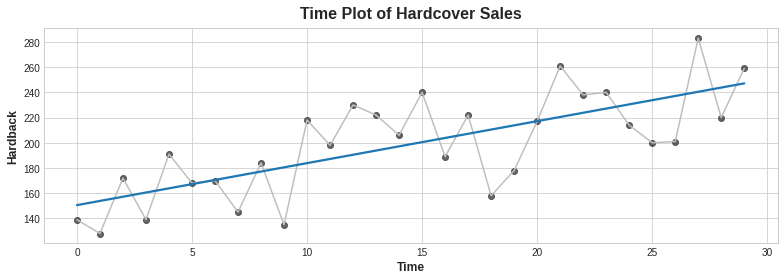

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)

fig, ax = plt.subplots()
ax.plot('Time', 'Hardback', data=df_new, color='0.75')
ax = sns.regplot(x='Time', y='Hardback', data=df_new, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [36]:
X = df_new.loc[:, ['Time']]  # features

In [41]:
y = df_new.loc[:, 'Hardback']  # target

In [43]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [45]:
y_pred = pd.Series(model.predict(X), index=X.index)

In [47]:
print(metrics.r2_score(y,y_pred))

0.529298964261638


In [48]:
print(model.coef_,model.intercept_)

[3.33058954] 150.53978494623658
